In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
size = []
for d in open("vocabulary_size.dat","r"):
    size.append(d)

In [3]:
df = pd.read_csv("heap.dat", header=None)
df.head()

,0,1
0,279673.0,0
1,629725.0,29661
2,911877.0,32828
3,1203710.0,35161
4,1487560.0,36244


In [4]:
size = np.array(size,dtype=float)
len(size)

1000

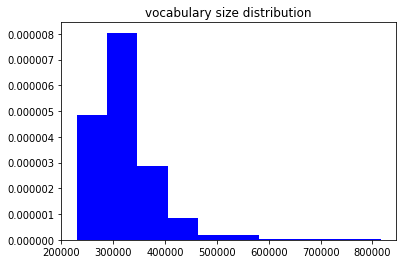

In [5]:
fig = plt.figure()
plt.hist(size, density=True, color='blue')
plt.title("vocabulary size distribution")
plt.show()

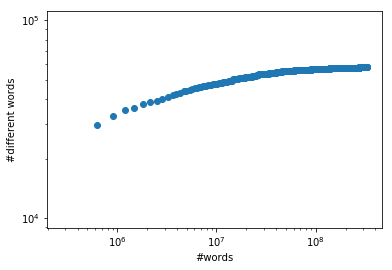

In [35]:
x = np.array(df.loc[:,0].values)
fig = plt.figure()
plt.scatter(x, df.loc[:,1].values)
plt.xlabel("#words")
plt.ylabel("#different words")
plt.xscale('log')
plt.yscale('log')
#plt.scatter(x, 100000*np.power(x, 0.01))
plt.show()